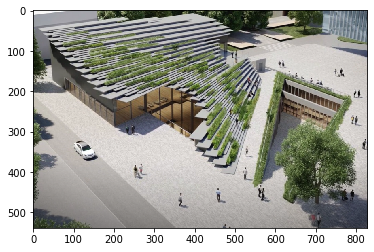

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读入灰度图像并显示（imread用0参数）
img = cv2.imread('./PLAZA/PLAZA.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

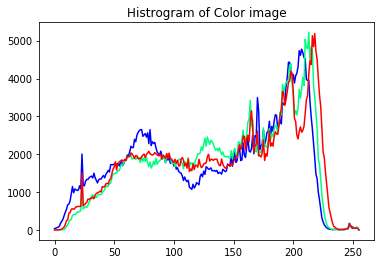

In [9]:
color = ['blue','springgreen','red']  #稍微调整显示颜色，提高可视化效果
for i in [0,1,2]:
    hist = cv2.calcHist([img],[i], None, [256], [0.0,255.0])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.show()

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def create_rgb_hist(image):
    """"创建 RGB 三通道直方图（直方图矩阵）"""
    h, w, c = image.shape
    # 创建一个（16*16*16,1）的初始矩阵，作为直方图矩阵 
    # 16*16*16的意思为三通道每通道有16个bins
    rgbhist = np.zeros([16 * 16 * 16, 1], np.float32)
    bsize = 256 / 16
    for row in range(h):
        for col in range(w):
            b = image[row, col, 0]
            g = image[row, col, 1]
            r = image[row, col, 2]
            # 人为构建直方图矩阵的索引，该索引是通过每一个像素点的三通道值进行构建
            index = int(b / bsize) * 16 * 16 + int(g / bsize) * 16 + int(r / bsize)
           	# 该处形成的矩阵即为直方图矩阵
            rgbhist[int(index), 0] += 1
    plt.ylim([0, 10000])
    plt.grid(color='r', linestyle='--', linewidth=0.5, alpha=0.3)
    return rgbhist

def hist_compare(image1, image2):
    """直方图比较函数"""
    # 创建第一幅图的rgb三通道直方图（直方图矩阵）
    hist1 = create_rgb_hist(image1)
    # 创建第二幅图的rgb三通道直方图（直方图矩阵）
    hist2 = create_rgb_hist(image2)
    # 进行三种方式的直方图比较
    match1 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    match2 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    match3 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(match1, match2, match3))

def histshow(src1,src2):
    print(src1+" _AND_ "+src2)
    
    src1 = cv2.imread(src1)
    src2 = cv2.imread(src2)    
    hmerge = np.hstack((src1, src2)) 
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
    plt.show()
    
    plt.subplot(1,2,1)
    plt.plot(create_rgb_hist(src1))
    plt.subplot(1,2,2)
    plt.plot(create_rgb_hist(src2))
    hist_compare(src1, src2)
    plt.show()

## 比较方式（method）

1. `巴氏距离比较(method=cv.HISTCMP_BHATTACHARYYA)` **值越小，相关度越高**，最大值为1，最小值为0 
2. `相关性比较 (method=cv.HISTCMP_CORREL)` **值越大，相关度越高**，最大值为1，最小值为0
3. `卡方比较(method=cv.HISTCMP_CHISQR)` **值越小，相关度越高**，最大值无上界，最小值0

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test01.PNG


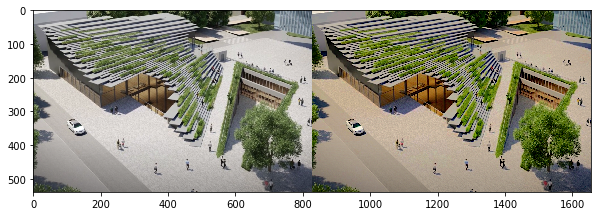

巴氏距离：0.6960244150900334, 相关性：0.11492826366923647, 卡方：55566909.371408336


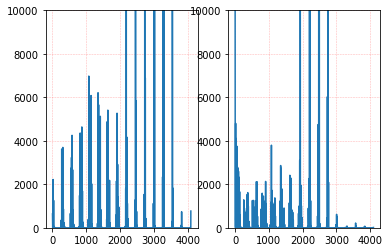

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test02.PNG


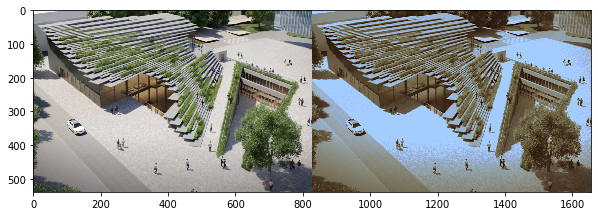

巴氏距离：0.8623636093704585, 相关性：0.07407070830720333, 卡方：5911889.136024984


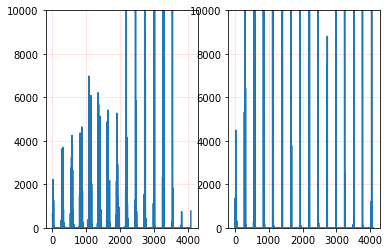

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test03.PNG


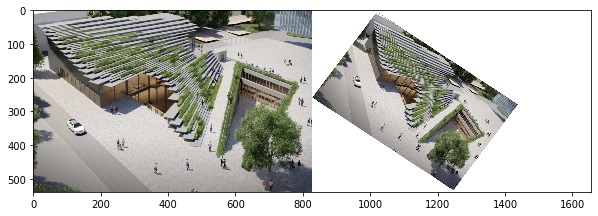

巴氏距离：0.607587876111891, 相关性：0.0972057010622477, 卡方：104830743.36028044


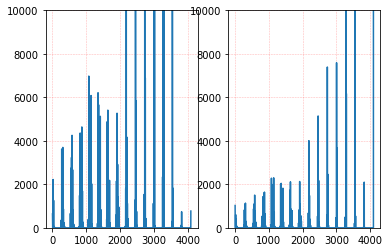

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test04.PNG


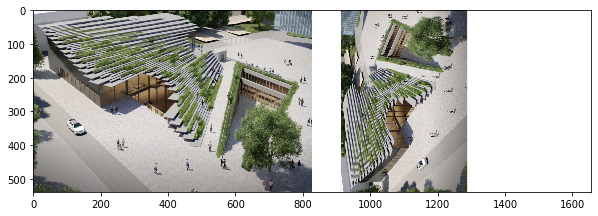

巴氏距离：0.5438435503754822, 相关性：0.13957108856771705, 卡方：75873940.96639706


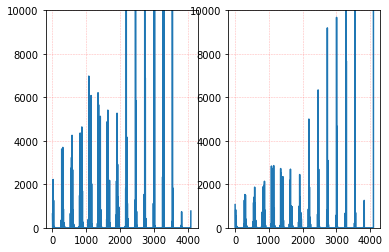

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test05.PNG


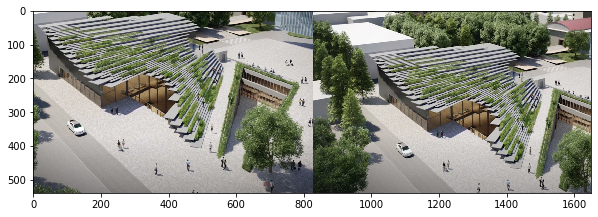

巴氏距离：0.20799200204464927, 相关性：0.8918526756342521, 卡方：580115.5989940395


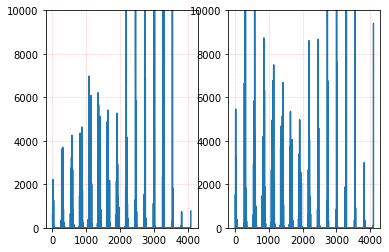

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test06.PNG


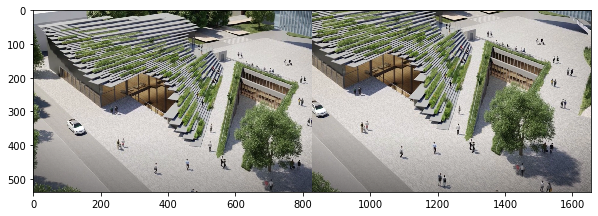

巴氏距离：0.0996889722060361, 相关性：0.9852662463931672, 卡方：30587.211717483216


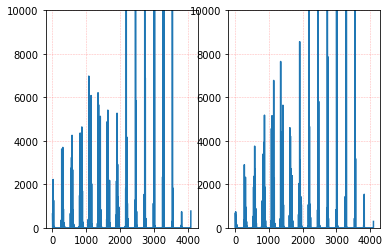

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test07.PNG


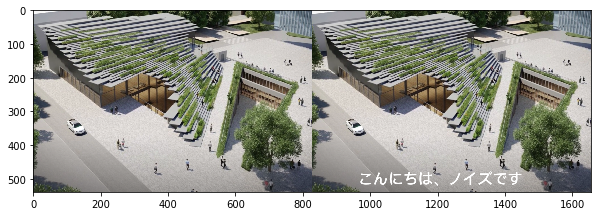

巴氏距离：0.04055871950430901, 相关性：0.9983605527138599, 卡方：15018.453790829355


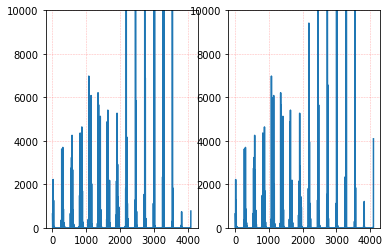

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test08.PNG


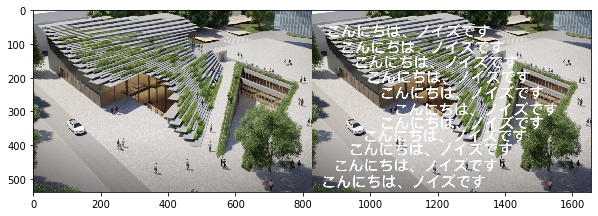

巴氏距离：0.18931169349536334, 相关性：0.8635398256197163, 卡方：1795699.5600298836


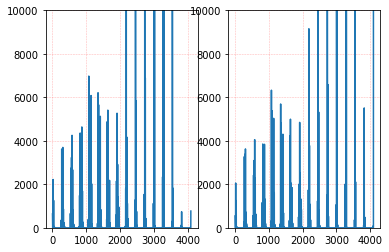

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test09.PNG


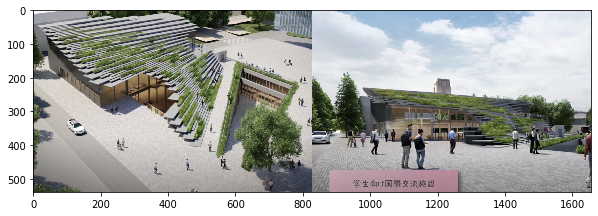

巴氏距离：0.5851651035878457, 相关性：0.3749773251244377, 卡方：213050737.46674082


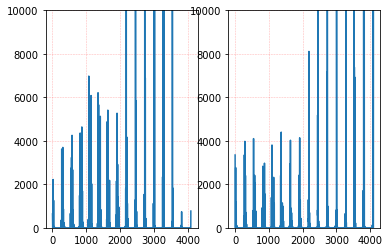

./PLAZA/PLAZA.PNG _AND_ ./PLAZA/PLAZA_test010.PNG


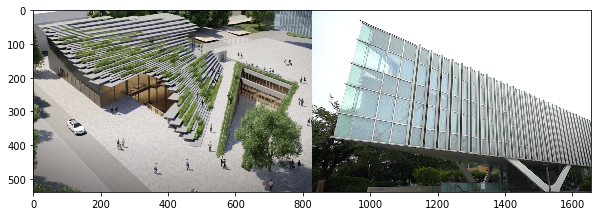

巴氏距离：0.6963152591742311, 相关性：0.15134753237124687, 卡方：65623961.44630067


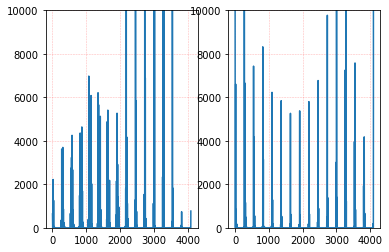

In [22]:
dis = "./PLAZA/"
imgname1 = "PLAZA"
img1 = dis+imgname+".PNG"

for i in range(1,11):
    img2 = dis+imgname+"_test0"+str(i)+".PNG"
    histshow(img1, img2)